# Week 2 - Exploratory Data Analysis (EDA)
In this notebook, we'll perform detailed **Exploratory Data Analysis (EDA)** on the cleaned transaction data to understand fraud patterns, feature relationships, and class imbalance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Load Week 1 cleaned data
df = pd.read_csv('transactions_cleaned_week1.csv')
print('✅ Data Loaded Successfully')
print(df.shape)
df.head()

✅ Data Loaded Successfully
(283726, 33)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,day_of_week
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.0


## 1. Class Distribution

C:\Users\bhara\AppData\Local\Temp\ipykernel_9244\2630497700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['skyblue','salmon'])


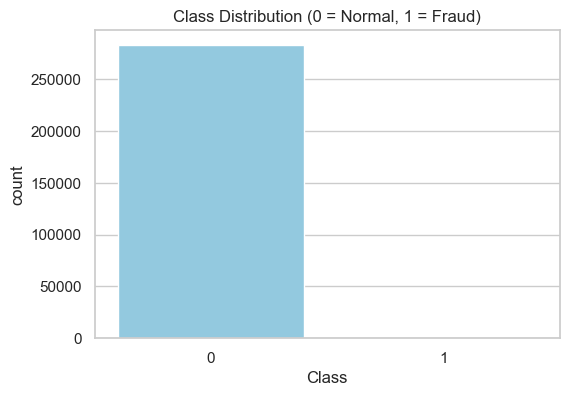

Fraud percentage: 0.167%


In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette=['skyblue','salmon'])
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.show()

fraud_ratio = df['Class'].mean() * 100
print(f'Fraud percentage: {fraud_ratio:.3f}%')

## 2. Summary Statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


## 3. Log(Amount+1) Distribution by Class

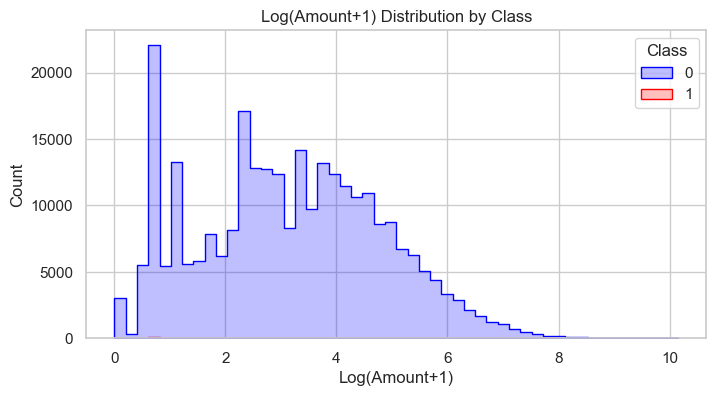

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(x=np.log1p(df['Amount']), hue=df['Class'], bins=50, palette=['blue','red'], element='step')
plt.title('Log(Amount+1) Distribution by Class')
plt.xlabel('Log(Amount+1)')
plt.show()

## 4. Boxplot of Amount by Class

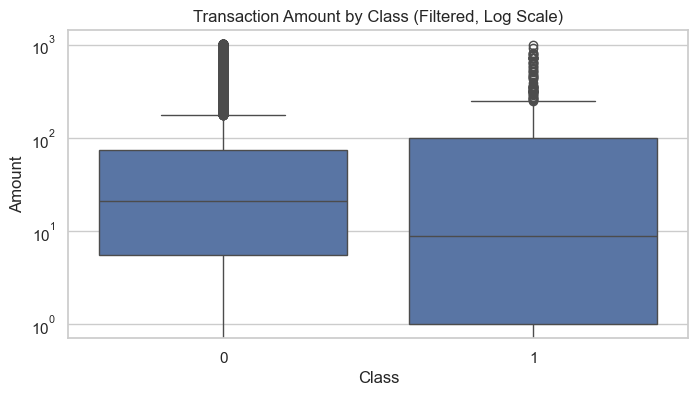

In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df[df['Amount'] < df['Amount'].quantile(0.99)])
plt.yscale('log')
plt.title('Transaction Amount by Class (Filtered, Log Scale)')
plt.show()

## 5. Fraud Rate by Hour

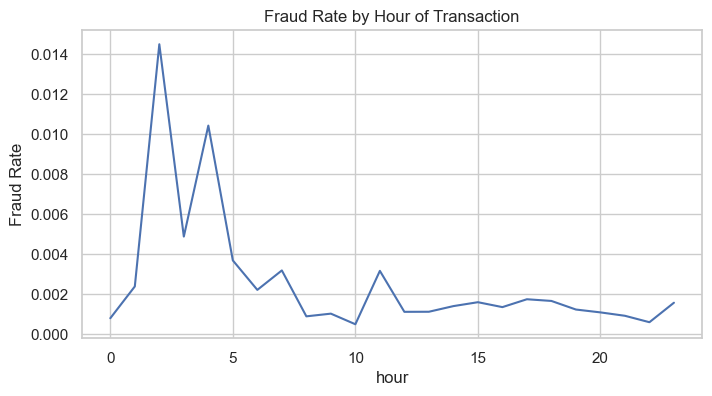

In [7]:
if 'hour' in df.columns:
    hourly = df.groupby('hour')['Class'].mean().reset_index()
    plt.figure(figsize=(8,4))
    sns.lineplot(data=hourly, x='hour', y='Class')
    plt.title('Fraud Rate by Hour of Transaction')
    plt.ylabel('Fraud Rate')
    plt.show()
else:
    print('No hour column found — skip this analysis.')

## 6. Correlation Heatmap

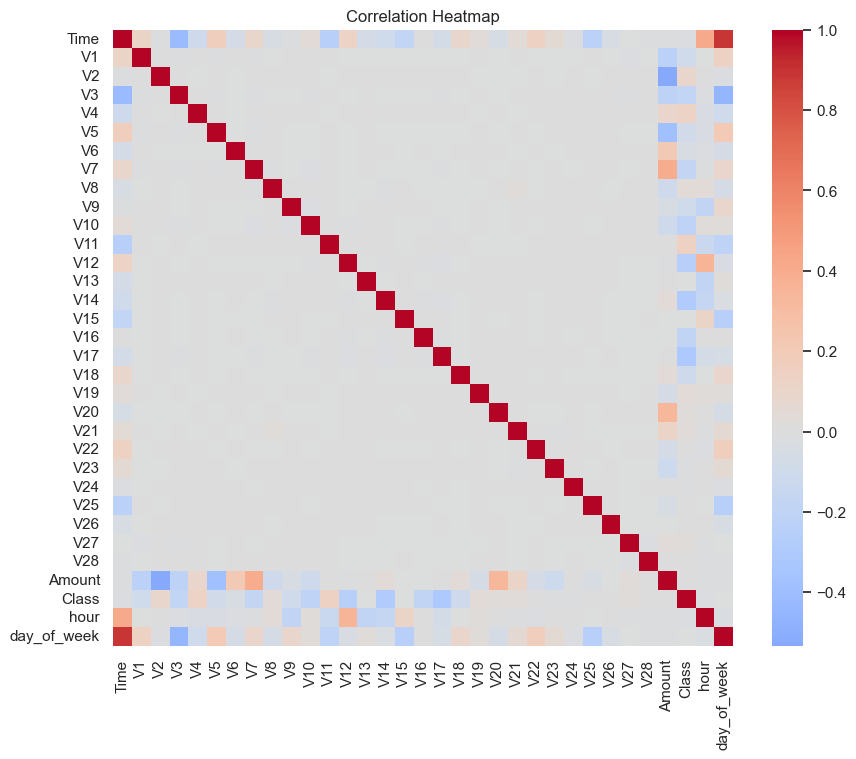

Top Correlated Features with Fraud Class:
Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64


In [8]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

corr_target = corr['Class'].sort_values(ascending=False)
print('Top Correlated Features with Fraud Class:')
print(corr_target.head(10))

## 7. Save Processed Data for Week 3

In [10]:
df.to_csv('transactions_week2_ready.csv', index=False)
print('✅ Week 2 dataset saved successfully in the current folder!')


✅ Week 2 dataset saved successfully in the current folder!
